### Description : This notebook contains the all the detected contours from an image.Here, we obtained 100+ values of contours,so we need to extract just the rectangles for invoice automation

### Author : Riya Chougule

### Date : 11/1/2021

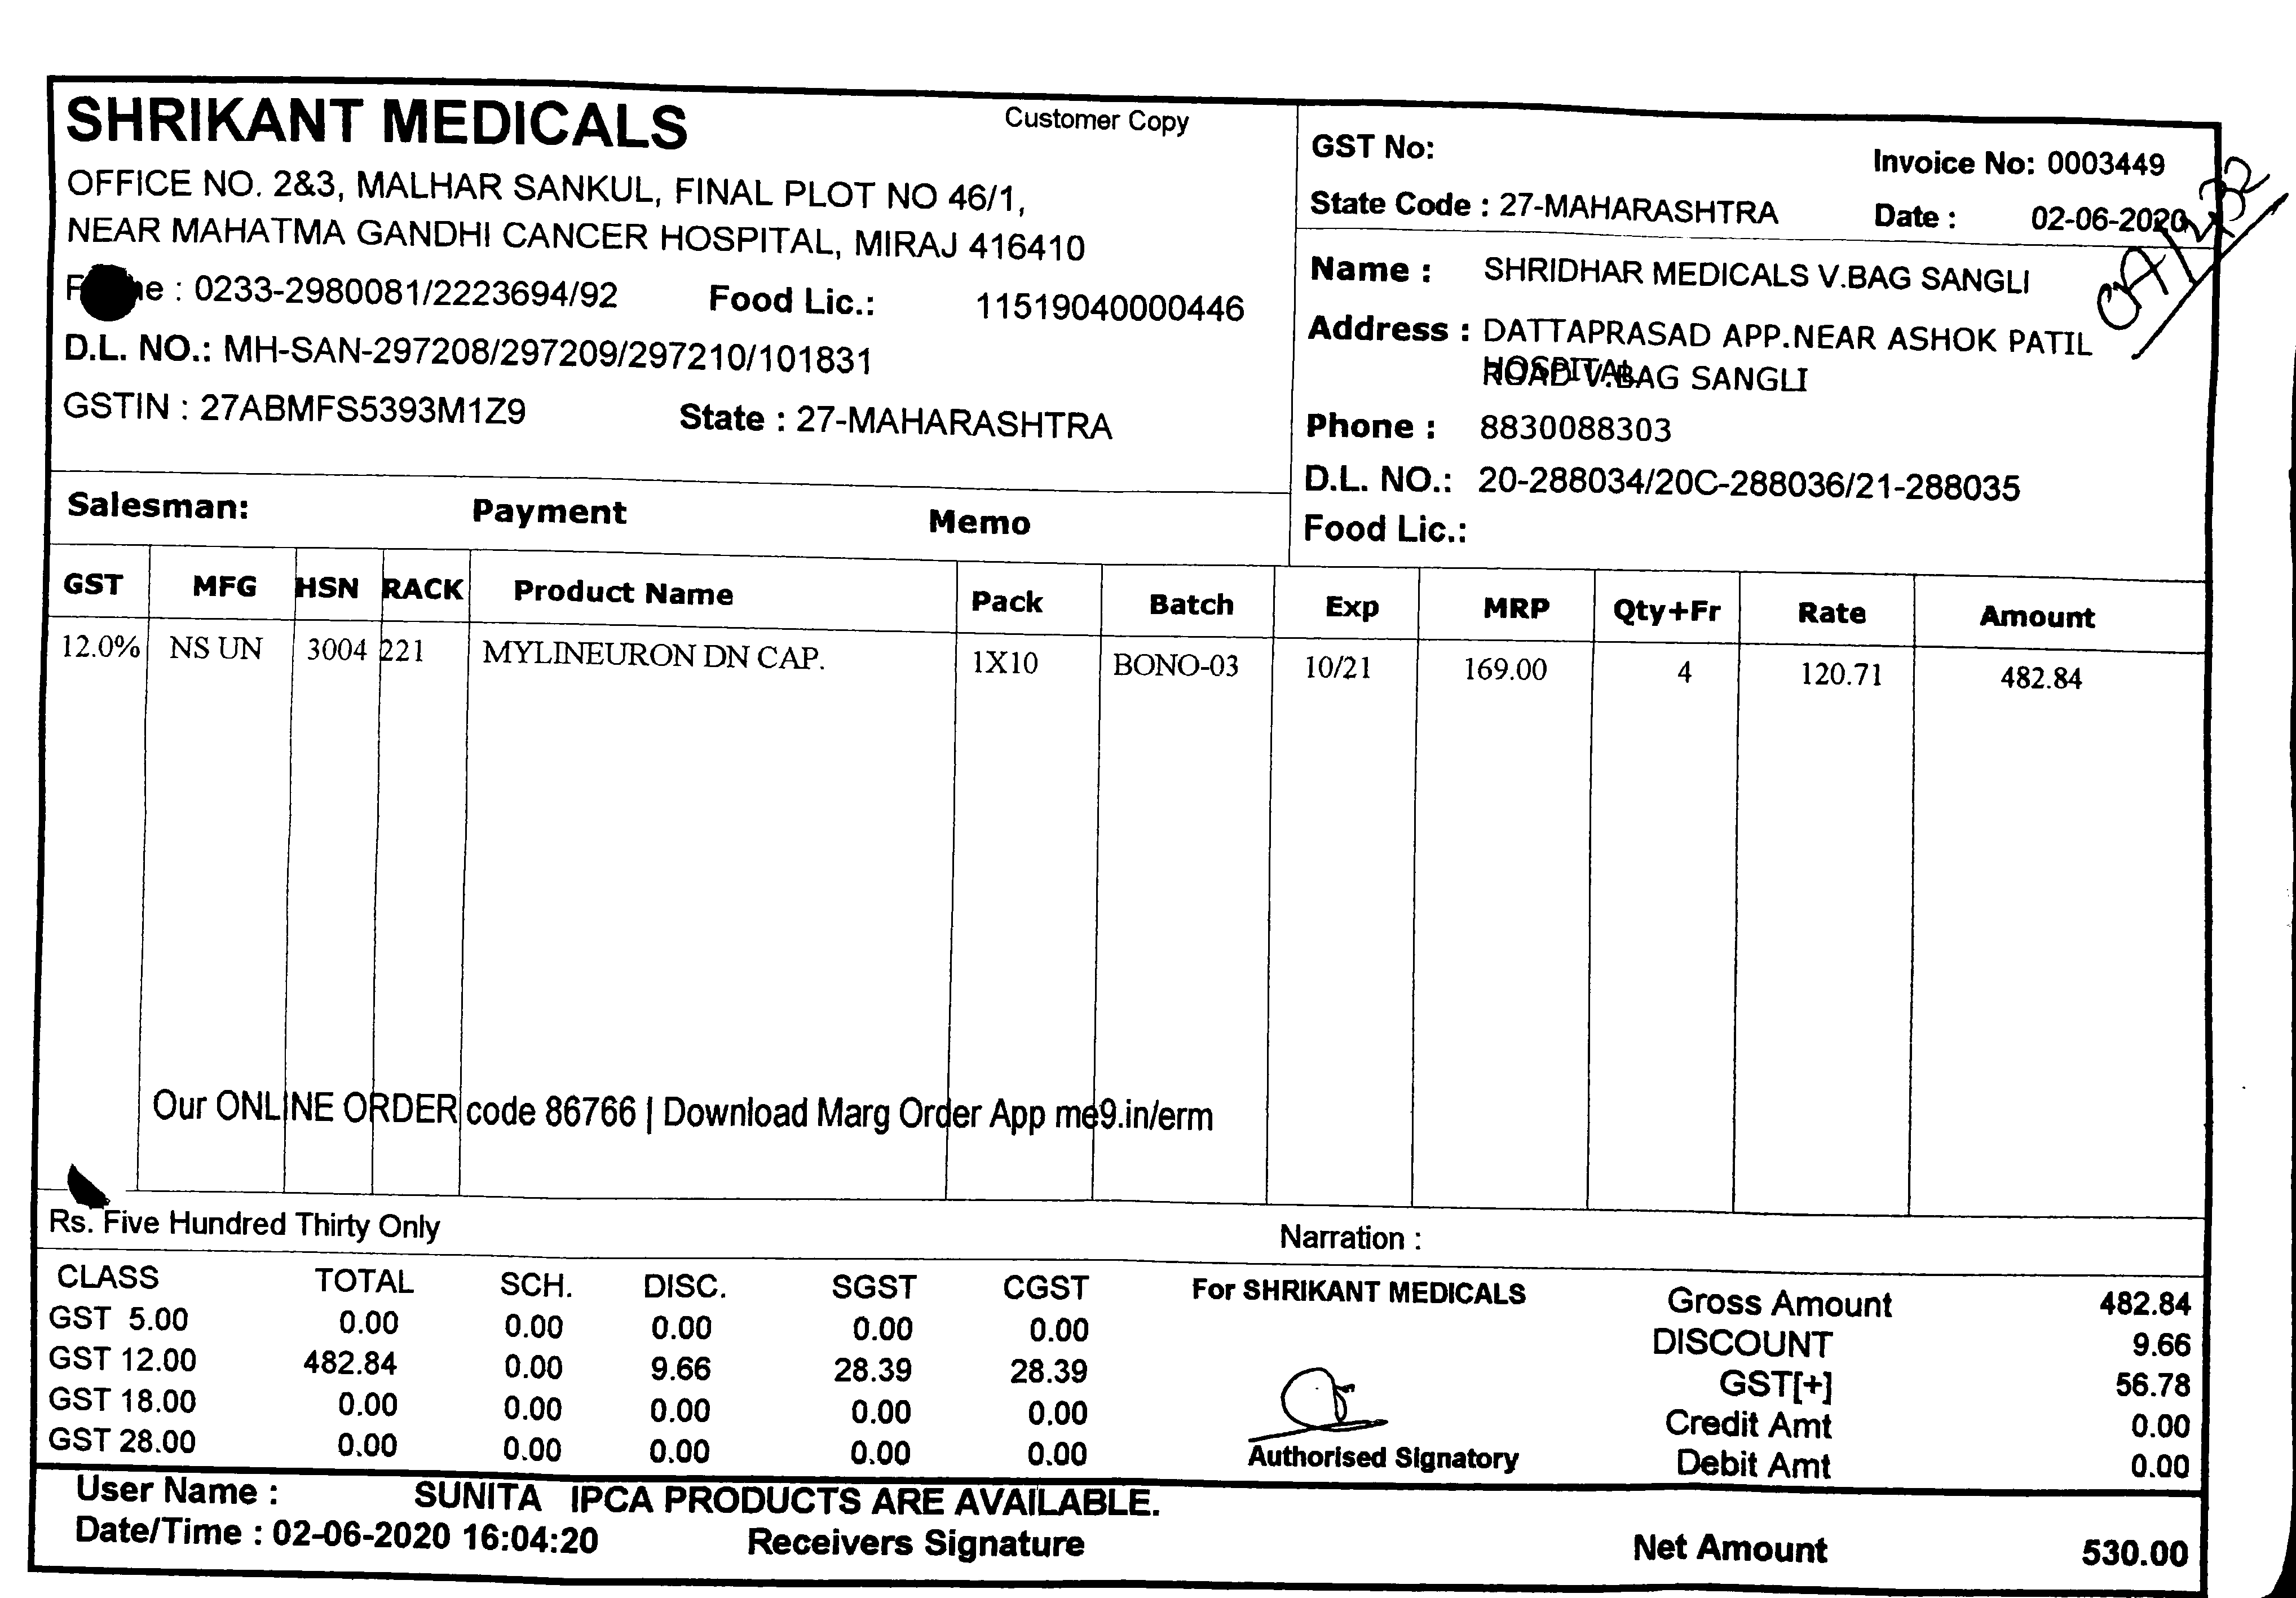

In [1]:
import cv2
from PIL import Image,ImageDraw,ImageFont
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
img = cv2.imread('inv10_binary.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res=Image.fromarray(img)
res

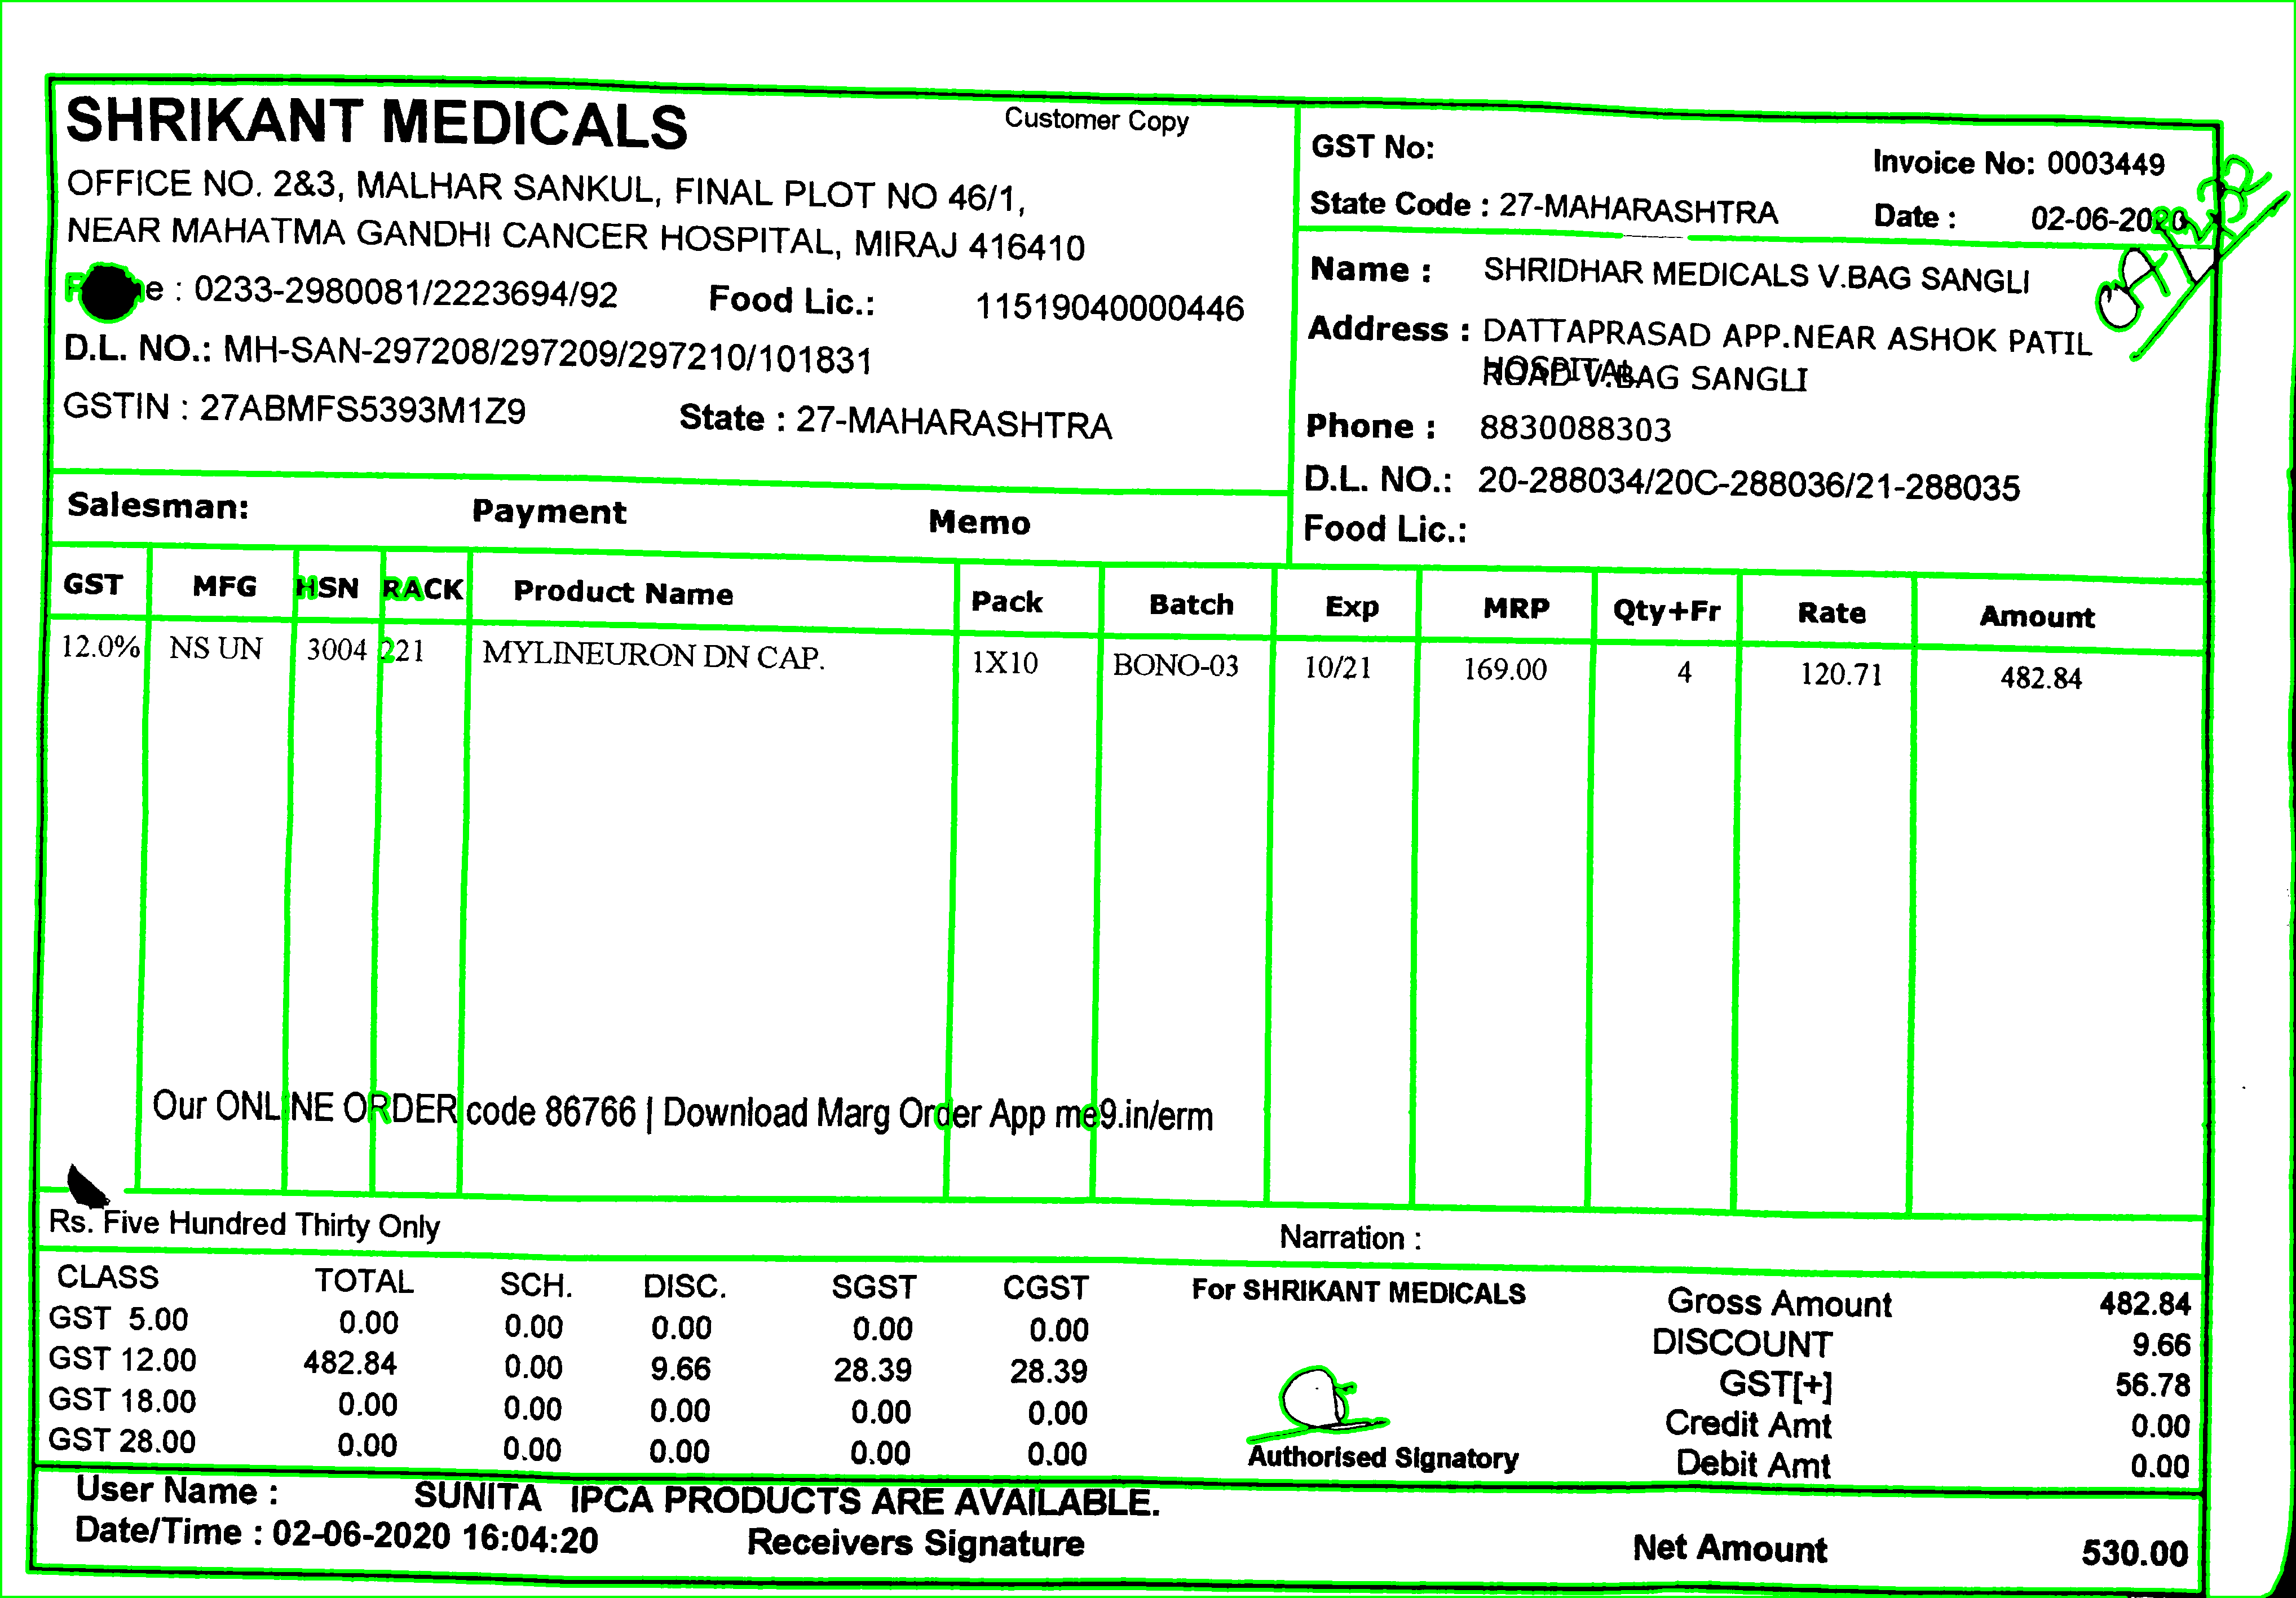

In [2]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)
_,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea,reverse=True) 
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(32) if perimeters[i]>perimeters[0]/12]
numcards=len(listindex)
imgcont = img.copy()
cnt=[cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
cont=Image.fromarray(imgcont)
cont

### Contours extracted

In [3]:
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    print(x,"        ",y,"        ",w,"        ",h)

90          146          2210          728
64          2215          3844          428
0          0          4072          2834
2288          187          1643          843
816          1105          879          1021
61          2605          3843          218
66          1094          3844          1169
1679          1123          578          1011
3387          1148          526          1011
3076          1143          318          1012
2506          1135          319          1009
89          837          2198          166
245          1097          277          1017
2817          1139          266          1010
2248          1132          266          1007
505          1100          171          1017
661          1103          170          1016
834          976          862          145
3396          1021          516          136
2517          1008          310          129
3086          1016          308          129
1954          1002          305          128
265          968

In [4]:
h, w, c = img.shape
print(w,h)

4072 2834


### Required contours are printed, rest are the irrelevant contours

In [5]:
W=4072
H=2834
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    if ((x+w)<=W) and ((y+h)<=H) and w>=100 and h>=100:
        try:
            print(x,"         ",y,"         ",w,"        ",h)
            cont1 = cont.crop((x,y,x+w,y+h))
            #cont1.show()                  # It shows the cropped rectangles(contours)
        except:
            print("An exception occurred")
            #print(x,y,w,h)
    else:
        print (x,y, ": Irrelevant coordinates")

90           146           2210          728
64           2215           3844          428
0           0           4072          2834
2288           187           1643          843
816           1105           879          1021
61           2605           3843          218
66           1094           3844          1169
1679           1123           578          1011
3387           1148           526          1011
3076           1143           318          1012
2506           1135           319          1009
89           837           2198          166
245           1097           277          1017
2817           1139           266          1010
2248           1132           266          1007
505           1100           171          1017
661           1103           170          1016
834           976           862          145
3396           1021           516          136
2517           1008           310          129
3086           1016           308          129
1954           1002